# Final Gaussian Function + XGBoost Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import git
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir

In [2]:
# import master dataset
df = pd.read_csv(f"{homedir}/PreliminaryModels/completed_master_X.csv")
df.head()

,index,fips,date,county,state,cases,deaths,DDFD,DW,DM,...,Total households!!Households with one or more people 65 years and over,Total households!!Average household size,RELATIONSHIP!!Population in households,Cardiovascular Disease (AAMC),Fraction of Active Physicians Who Are Age 60 or Older 2018 (AAMC),Active Physicians per 100000 Population 2018 (AAMC),pclon10,pclat10,Days from Reopening,mobility
0,4808,49011,2020-03-22,Davis,Utah,3.0,1.0,0,6,22,...,23748.0,3.34,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-40.0,22.0
1,4809,49011,2020-03-23,Davis,Utah,10.0,0.0,1,0,23,...,23748.0,3.34,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-39.0,96.0
2,4810,49011,2020-03-24,Davis,Utah,2.0,0.0,2,1,24,...,23748.0,3.34,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-38.0,97.0
3,4811,49011,2020-03-25,Davis,Utah,4.0,0.0,3,2,25,...,23748.0,3.34,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-37.0,101.0
4,4812,49011,2020-03-26,Davis,Utah,4.0,0.0,4,3,26,...,23748.0,3.34,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-36.0,97.0


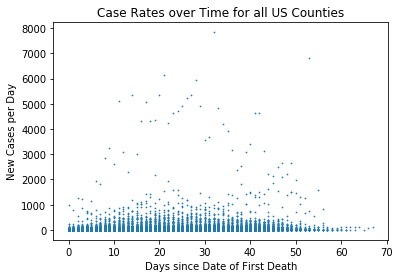

In [3]:
# visualize case rates over time for all counties
plt.scatter(np.array(df['DDFD']), np.array(df['cases']), s=0.5)
plt.title('Case Rates over Time for all US Counties')
plt.xlabel('Days since Date of First Death')
plt.ylabel('New Cases per Day')
plt.show()

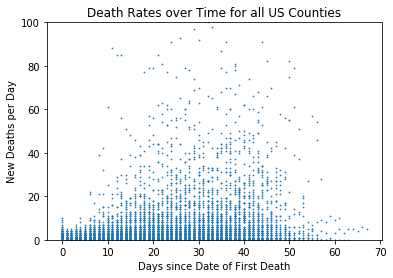

In [4]:
# visualize death rates over time for all counties
plt.scatter(np.array(df['DDFD']), np.array(df['deaths']), s=0.5)
plt.ylim((0,100)) # allows display of non-outlier/majority of counties
plt.title('Death Rates over Time for all US Counties')
plt.xlabel('Days since Date of First Death')
plt.ylabel('New Deaths per Day')
plt.show()

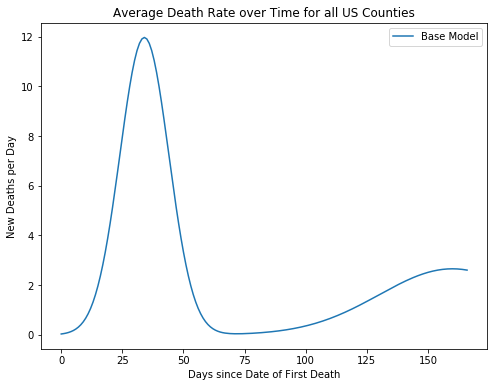

In [13]:
# fit the base Gaussian function
import scipy.optimize as opt

# 
def f(x, mu, sig):
    return (1 / (sig * np.sqrt(2 * np.pi))) * (np.exp(-(x - mu)*(x - mu)/(2*sig*sig)))

# initialize randomized parameters
mu, sig = np.random.exponential(size=2)

norm_scale = max(df['deaths'])
x = df['DDFD']
y = df['deaths'] / norm_scale

# fit function using least squares minimization
# (mu_, sig_), _ = opt.curve_fit(f, x, y, [mu, sig], )
# def fit_func(X): 
    # return list([norm_scale * f(i, mu_, sig_)] for i in X) 

# intuitive parameters (as opposed to fitting)
mu_int1 = 34
sig_int1 = 10
mu_int2 = 160
sig_int2 = 30
peak_scale = 300
peak_scale2 = 200
def int_func(X):
    return list([peak_scale * f(i, mu_int1, sig_int1) + peak_scale2 * f(i, mu_int2, sig_int2)] for i in X) 

pred_range = list(range(0, max(x) + 100))

# plot base model versus all counties
plt.figure(figsize=(8,6))
# plt.scatter(df['DDFD'], df['deaths'], s=0.5)
plt.plot(pred_range, int_func(pred_range))
plt.title('Average Death Rate over Time for all US Counties')
plt.xlabel('Days since Date of First Death')
plt.ylabel('New Deaths per Day')
plt.legend(['Base Model'])
plt.show()

In [14]:
# add base model predictions
df['BMP'] = np.array(int_func(df['DDFD']), dtype=float)

In [15]:
# add base model residuals
df['residuals'] = df['deaths'] - df['BMP']
df.head()

,index,fips,date,county,state,cases,deaths,DDFD,DW,DM,...,RELATIONSHIP!!Population in households,Cardiovascular Disease (AAMC),Fraction of Active Physicians Who Are Age 60 or Older 2018 (AAMC),Active Physicians per 100000 Population 2018 (AAMC),pclon10,pclat10,Days from Reopening,mobility,BMP,residuals
0,4808,49011,2020-03-22,Davis,Utah,3.0,1.0,0,6,22,...,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-40.0,22.0,0.036968,0.963032
1,4809,49011,2020-03-23,Davis,Utah,10.0,0.0,1,0,23,...,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-39.0,96.0,0.051679,-0.051679
2,4810,49011,2020-03-24,Davis,Utah,2.0,0.0,2,1,24,...,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-38.0,97.0,0.071525,-0.071525
3,4811,49011,2020-03-25,Davis,Utah,4.0,0.0,3,2,25,...,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-37.0,101.0,0.098008,-0.098008
4,4812,49011,2020-03-26,Davis,Utah,4.0,0.0,4,3,26,...,348936.0,12.016369,0.265,216.2,-111.958756,41.01957,-36.0,97.0,0.132959,-0.132959


In [16]:
# final preparations for residuals model training

df['county'] = df['county'].astype('category')
df['state'] = df['state'].astype('category')
df['cat_county'] = df['county'].cat.codes
df['cat_state'] = df['state'].cat.codes
df.head()

,index,fips,date,county,state,cases,deaths,DDFD,DW,DM,...,Fraction of Active Physicians Who Are Age 60 or Older 2018 (AAMC),Active Physicians per 100000 Population 2018 (AAMC),pclon10,pclat10,Days from Reopening,mobility,BMP,residuals,cat_county,cat_state
0,4808,49011,2020-03-22,Davis,Utah,3.0,1.0,0,6,22,...,0.265,216.2,-111.958756,41.01957,-40.0,22.0,0.036968,0.963032,267,45
1,4809,49011,2020-03-23,Davis,Utah,10.0,0.0,1,0,23,...,0.265,216.2,-111.958756,41.01957,-39.0,96.0,0.051679,-0.051679,267,45
2,4810,49011,2020-03-24,Davis,Utah,2.0,0.0,2,1,24,...,0.265,216.2,-111.958756,41.01957,-38.0,97.0,0.071525,-0.071525,267,45
3,4811,49011,2020-03-25,Davis,Utah,4.0,0.0,3,2,25,...,0.265,216.2,-111.958756,41.01957,-37.0,101.0,0.098008,-0.098008,267,45
4,4812,49011,2020-03-26,Davis,Utah,4.0,0.0,4,3,26,...,0.265,216.2,-111.958756,41.01957,-36.0,97.0,0.132959,-0.132959,267,45


In [22]:
# residual model using XGBoost
import xgboost as xgb

#train_df = df.sample(frac=0.7)
#test_df = df.loc[~df.index.isin(train_df.index)]

'''from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

dates = df['date']
counties = df['county']
states = df['state']

df = df.drop(columns=['date', 'county', 'state'])

imp = IterativeImputer()
df = pd.DataFrame(imp.fit_transform(df.values), index=df.index, columns=df.columns)

df['date'] = dates
df['county'] = counties
df['state'] = states'''

train_df = df.head(int(len(df) * 0.9))
test_df = df.tail(len(df) - int(len(df) * 0.9))

reg = xgb.XGBRegressor(n_estimators=300,
                       reg_lambda=1,
                       gamma=10,
                       max_depth=6)
reg.fit(train_df.drop(columns=['index', 'date', 'fips', 
                         'residuals', 'deaths', 'cases', 'county', 
                         'state']), train_df['residuals'])

'''reg = GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=5,
                                learning_rate=0.1)

reg.fit(train_df.drop(columns=['index', 'date', 'fips', 
                         'residuals', 'deaths', 'cases', 'county', 
                         'state']), train_df['residuals'])'''

[14:33:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


"reg = GradientBoostingRegressor(loss='quantile', alpha=0.95,\n                                n_estimators=250, max_depth=5,\n                                learning_rate=0.1)\n\nreg.fit(train_df.drop(columns=['index', 'date', 'fips', \n                         'residuals', 'deaths', 'cases', 'county', \n                         'state']), train_df['residuals'])"

In [18]:
y_pred = reg.predict(test_df.drop(columns=['index', 'date', 'fips', 
                         'residuals', 'deaths', 'cases', 'county', 
                         'state']))

from sklearn.metrics import mean_squared_error
loss = mean_squared_error(test_df['residuals'], y_pred)
print(loss)
np.sqrt(loss)

3.6509896537456483


1.9107563041229638

In [21]:
loss = mean_squared_error(df['deaths'], df['BMP'])
print(loss)
np.sqrt(loss)

879.4055110662194


29.654772146590833

In [20]:
reg.get_booster().get_score(importance_type='gain')

{'D4DP': 196912.4367922506,
 'D1DP': 10729.635779965485,
 'BMP': 30832.60958608585,
 'D3DP': 35049.814704617456,
 'D2DP': 3461.523935061653,
 'C1WP': 1489.8590183067672,
 'D5DP': 3378.837597606102,
 'PopulationDensityperSqMile2010': 22473.43675052,
 'PopMale75-842010': 12721.690426250001,
 'Days from Reopening': 5716.955048346541,
 'mobility': 920.2220998884618,
 'DDFD': 351515.8302913763,
 'DW': 1031.8597640939279,
 'StrokeMortality': 1858.3012477297302,
 '3-YrMortalityAge65-74Years2015-17': 1057.33572825,
 'DM': 746.3622709768293,
 'PopMale>842010': 15888.785472285712,
 'Cardiovascular Disease (AAMC)': 3963.0209252222226,
 'Jun Precipitation / inch': 940.3080336166666,
 'PopFmle75-842010': 1376.8309046666666,
 'C6WP': 458.6320059086957,
 'PopFmle10-142010': 3756.341252,
 'pclat10': 1066.7642691782605,
 'pclon10': 1635.626907,
 'PopMale10-142010': 1744.0341276666666,
 'C4WP': 1153.5782022089545,
 'PopFmle20-242010': 7647.36035,
 'Total households!!Average household size': 757.40753597

In [ ]:
from tqdm import tqdm
import datetime as dt

# string to datetime object conversion
def date_from_str(ds):
    year = int(ds[:4])
    month = int(ds[5:7])
    day = int(ds[8:])
    return dt.datetime(year, month, day)

# datetime object to string conversion
def str_from_date(date):
    return date.strftime("%Y-%m-%d")

# returns date that is N weeks prior to date
def weeks_prior_date(date, N):
    return (date - dt.timedelta(weeks=N))

for county in tqdm(list(set(df['fips'])):
    

In [24]:
print(df.columns)

Index(['index', 'fips', 'date', 'county', 'state', 'cases', 'deaths', 'DDFD',
       'DW', 'DM', 'D1DP', 'D2DP', 'D3DP', 'D4DP', 'D5DP', 'C1WP', 'C2WP',
       'C3WP', 'C4WP', 'C5WP', 'C6WP', 'PopulationEstimate2018',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'DiabetesPercentage',
       'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
       '#FTEHospitalTotal2017', '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio',
       'PopMale10-142010', 'PopFmle10-142010', 'PopMale15-192010',
       'PopFmle15-192010', 'PopMale20-242010', 'PopFmle20-242010',
       'PopMale25-292010', 'PopFmle25-292010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'PopMale>842010', 'PopFmle>842010', '3-YrMortalityAge45-54Years2015-17',
       '3-YrMortalityAge55-64Year